#EXPLORATORY DATA ANALYSIS

We have 'Students Performance in Exams' data set (from kaggle: Jakki: https://www.kaggle.com/spscientist/students-performance-in-exams).








This dataset have each student as a data point (1000 students in total), and for each, we have 8 columns, each column represents a different aspect or measure of the specific country.

##Importing the libraries

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
sns.set()

##Loading the dataset

In [2]:
raw_data = pd.read_csv('StudentsPerformance.csv')
raw_data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


##Exploring the dataset

In [3]:
raw_data.tail()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77
999,female,group D,some college,free/reduced,none,77,86,86


In [4]:
raw_data.shape

(1000, 8)

###Introduction of a new attribute to average the scores

In [5]:
raw_data['average total score']=(raw_data['math score']+raw_data['reading score']+raw_data['writing score'])/3
raw_data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average total score
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333


In [6]:
raw_data.describe(include='all') #including the non-value attributes

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average total score
count,1000,1000,1000,1000,1000,1000.00000,1000.000000,1000.000000,1000.000000
unique,2,5,6,2,2,NaN,NaN,NaN,NaN
top,female,group C,some college,standard,none,NaN,NaN,NaN,NaN
freq,518,319,226,645,642,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,66.08900,69.169000,68.054000,67.770667
std,NaN,NaN,NaN,NaN,NaN,15.16308,14.600192,15.195657,14.257326
min,NaN,NaN,NaN,NaN,NaN,0.00000,17.000000,10.000000,9.000000
25%,NaN,NaN,NaN,NaN,NaN,57.00000,59.000000,57.750000,58.333333
50%,NaN,NaN,NaN,NaN,NaN,66.00000,70.000000,69.000000,68.333333
75%,NaN,NaN,NaN,NaN,NaN,77.00000,79.000000,79.000000,77.666667


In [7]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       1000 non-null   object 
 1   race/ethnicity               1000 non-null   object 
 2   parental level of education  1000 non-null   object 
 3   lunch                        1000 non-null   object 
 4   test preparation course      1000 non-null   object 
 5   math score                   1000 non-null   int64  
 6   reading score                1000 non-null   int64  
 7   writing score                1000 non-null   int64  
 8   average total score          1000 non-null   float64
dtypes: float64(1), int64(3), object(5)
memory usage: 70.4+ KB


In [8]:
raw_data.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score', 'average total score'],
      dtype='object')

In [9]:
raw_data.nunique()

gender                           2
race/ethnicity                   5
parental level of education      6
lunch                            2
test preparation course          2
math score                      81
reading score                   72
writing score                   77
average total score            194
dtype: int64

In [10]:
# checking specific unique values
for item in raw_data.columns:
  print(item)
  print(raw_data[item].unique())

gender
['female' 'male']
race/ethnicity
['group B' 'group C' 'group A' 'group D' 'group E']
parental level of education
["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
lunch
['standard' 'free/reduced']
test preparation course
['none' 'completed']
math score
[ 72  69  90  47  76  71  88  40  64  38  58  65  78  50  18  46  54  66
  44  74  73  67  70  62  63  56  97  81  75  57  55  53  59  82  77  33
  52   0  79  39  45  60  61  41  49  30  80  42  27  43  68  85  98  87
  51  99  84  91  83  89  22 100  96  94  48  35  34  86  92  37  28  24
  26  95  36  29  32  93  19  23   8]
reading score
[ 72  90  95  57  78  83  43  64  60  54  52  81  53  75  89  32  42  58
  69  73  71  74  70  65  87  56  61  84  55  44  41  85  59  17  39  80
  37  63  51  49  26  68  45  47  86  34  79  66  67  91 100  76  77  82
  92  93  62  88  50  28  48  46  23  38  94  97  99  31  96  24  29  40]
writing score
[ 74  88  93  44  75  78  92 

###Checking for missing values

In [11]:
# checking percentage of missing values
no_of_columns = raw_data.shape[0]
percentage_of_missing_data = raw_data.isnull().sum()/no_of_columns
print(percentage_of_missing_data)

gender                         0.0
race/ethnicity                 0.0
parental level of education    0.0
lunch                          0.0
test preparation course        0.0
math score                     0.0
reading score                  0.0
writing score                  0.0
average total score            0.0
dtype: float64


In [12]:
# finding numerical columns
category_columns_numerical = [col for col in raw_data.columns if raw_data.dtypes[col] == 'int64']
print(category_columns_numerical)

['math score', 'reading score', 'writing score']


In [13]:
# Categorial columns list
category_columns_categorical = [col for col in raw_data.columns if raw_data.dtypes[col] == 'object']
print(category_columns_categorical)

['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


In [0]:
##Visualizing the features

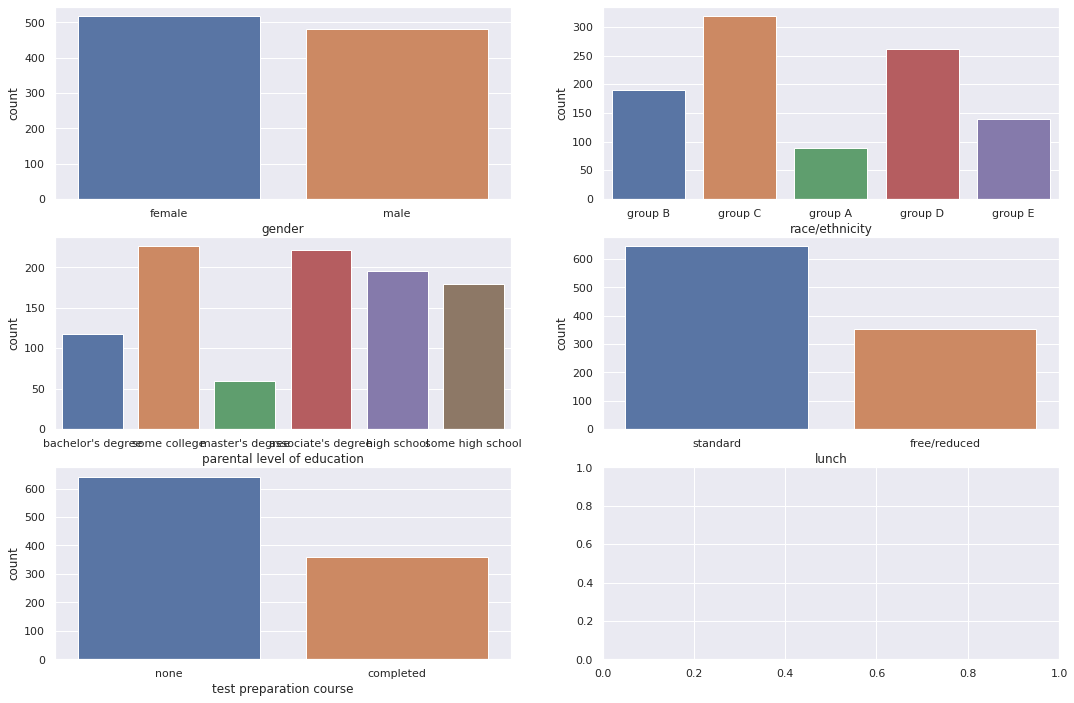

In [15]:
# Categorial columns values distribution
fig, axs = plt.subplots(nrows=3,ncols=2, figsize=(18, 12))
for col, ax in zip(category_columns_categorical[:], axs.ravel()):
    sns.countplot(x=col, data=raw_data, ax=ax)

Analysing Math Score

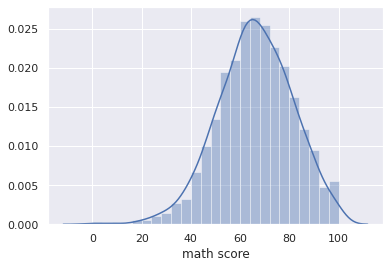

In [16]:
sns.distplot(raw_data['math score'], color='b')

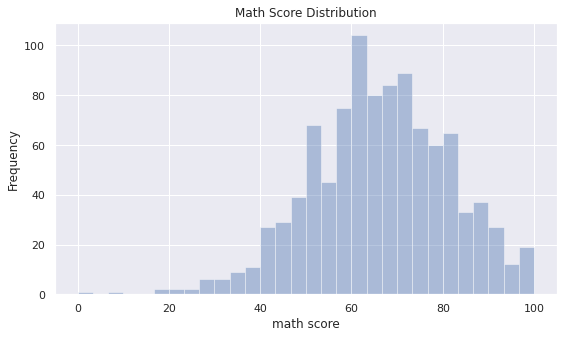

In [17]:
plt.figure(figsize=(9,5))
sns.distplot(raw_data['math score'], kde = False, color='b', bins = 30)
plt.ylabel('Frequency')
plt.title('Math Score Distribution')
plt.show()

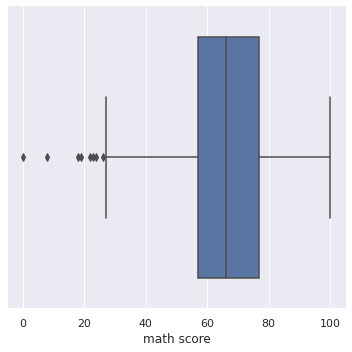

In [18]:
sns.catplot(x='math score', kind = 'box', data =raw_data)

In [19]:
#lets set a passmark to be used in analysing, say 40.
passmark = 50
raw_data['Math_Performance'] = np.where(raw_data['math score']<passmark, 'Fail', 'Pass')
raw_data.Math_Performance.value_counts()

Pass    865
Fail    135
Name: Math_Performance, dtype: int64

Analysing Reading Score



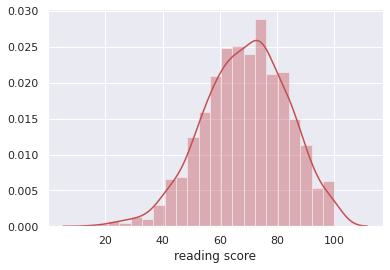

In [20]:
sns.distplot(raw_data['reading score'],color='r')

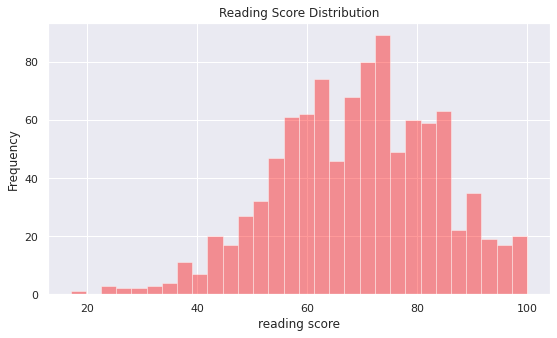

In [21]:
plt.figure(figsize=(9,5))
sns.distplot(raw_data['reading score'], kde = False, color='red', bins = 30)
plt.ylabel('Frequency')
plt.title('Reading Score Distribution')
plt.show()

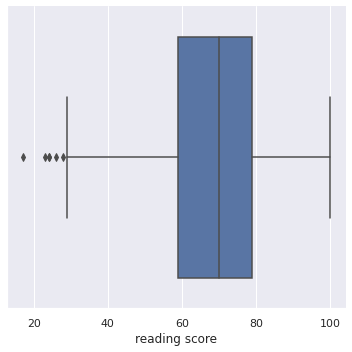

In [22]:
sns.catplot(x='reading score', kind = 'box', data =raw_data)

In [23]:
raw_data['Reading_Performance'] = np.where(raw_data['reading score']<passmark, 'Fail', 'Pass')
raw_data.Reading_Performance.value_counts()

Pass    910
Fail     90
Name: Reading_Performance, dtype: int64

Analysing Writing Score

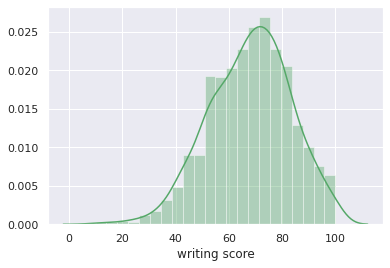

In [24]:
sns.distplot(raw_data['writing score'], color='g')

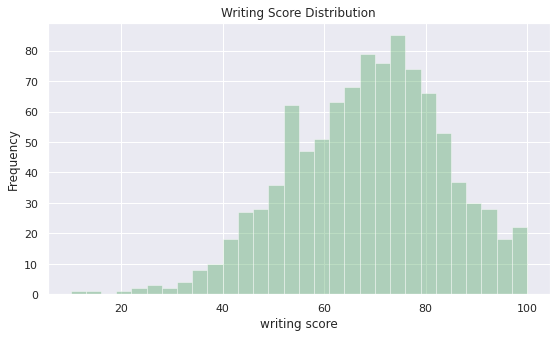

In [25]:
plt.figure(figsize=(9,5))
sns.distplot(raw_data['writing score'], kde = False, color='g', bins = 30)
plt.ylabel('Frequency')
plt.title('Writing Score Distribution')
plt.show()

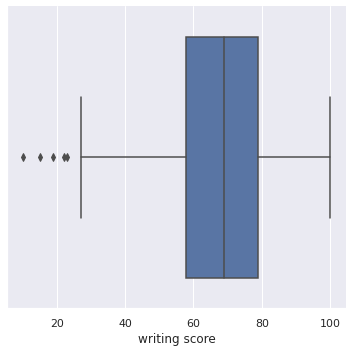

In [26]:
sns.catplot(x='writing score', kind = 'box', data =raw_data)

In [27]:
raw_data['Writing_Performance'] = np.where(raw_data['writing score']<passmark, 'Fail', 'Pass')
raw_data.Writing_Performance.value_counts()

Pass    886
Fail    114
Name: Writing_Performance, dtype: int64

Analysing Total Score

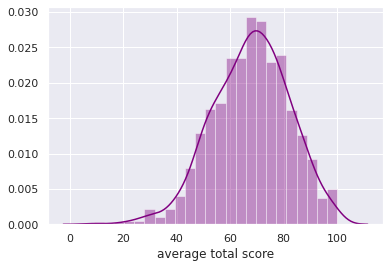

In [28]:
sns.distplot(raw_data['average total score'], color='purple')

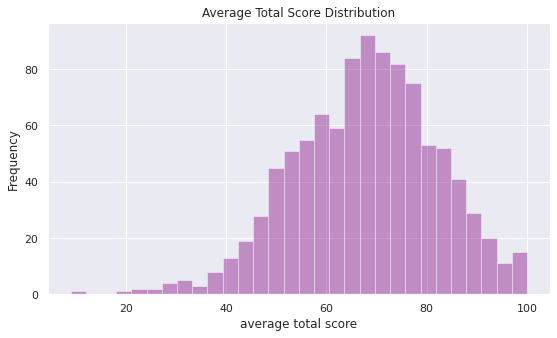

In [29]:
plt.figure(figsize=(9,5))
sns.distplot(raw_data['average total score'], kde = False, color='purple', bins = 30)
plt.ylabel('Frequency')
plt.title('Average Total Score Distribution')
plt.show()

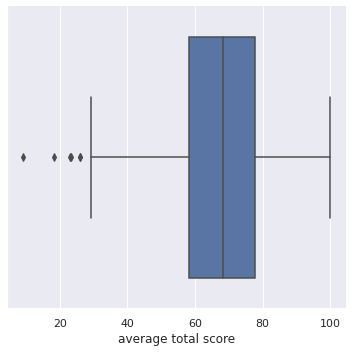

In [30]:
sns.catplot(x='average total score', kind = 'box', data =raw_data)

In [31]:
raw_data['Average_Total_Performance'] = np.where(raw_data['average total score']<passmark, 'Fail', 'Pass')
raw_data.Average_Total_Performance.value_counts()

Pass    897
Fail    103
Name: Average_Total_Performance, dtype: int64

In [0]:
# relationship plot(relplot)

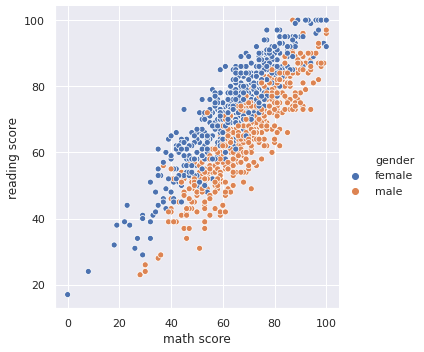

In [33]:
sns.relplot(x='math score', y='reading score', hue='gender', data=raw_data)

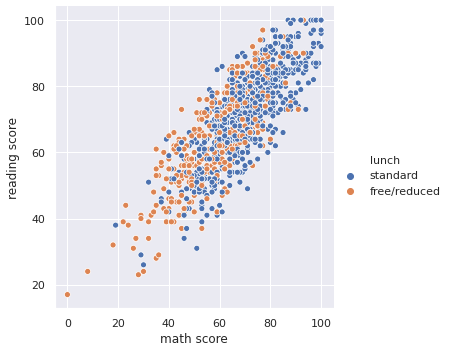

In [34]:
sns.relplot(x='math score', y='reading score', hue='lunch', data=raw_data)

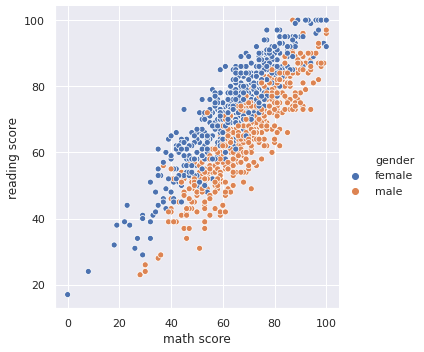

In [35]:
sns.relplot(x='math score', y='reading score', hue='gender', data=raw_data)

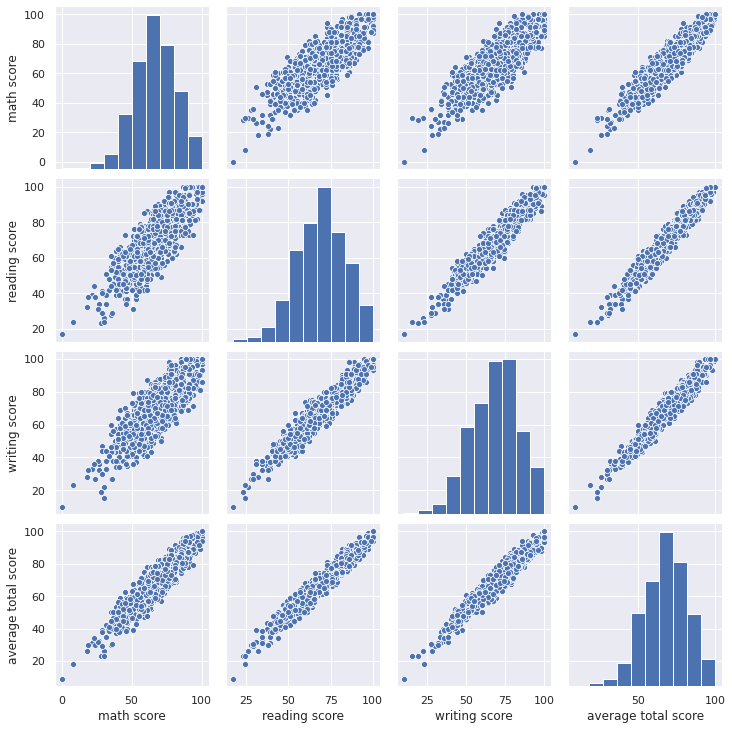

In [36]:
sns.pairplot(raw_data)

PARENTAL level of education

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

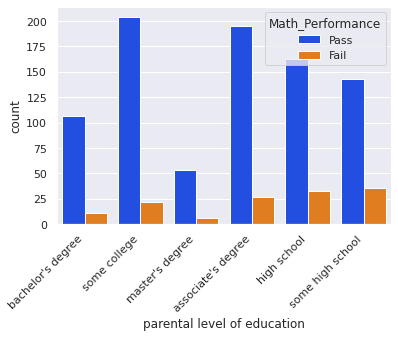

In [37]:
sns.countplot(x='parental level of education', data = raw_data, hue='Math_Performance', palette='bright')
plt.xticks(rotation=45, ha='right')

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

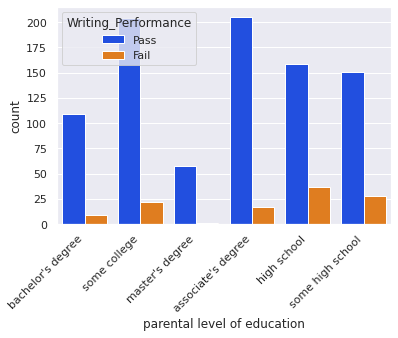

In [38]:
sns.countplot(x='parental level of education', data = raw_data, hue='Writing_Performance', palette='bright')
plt.xticks(rotation=45, ha='right')

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

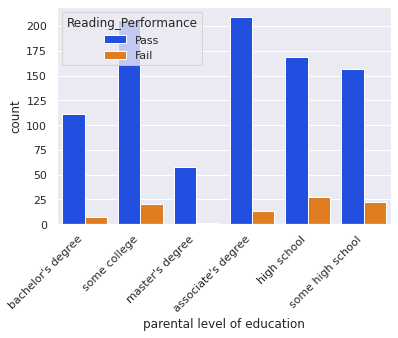

In [39]:
sns.countplot(x='parental level of education', data = raw_data, hue='Reading_Performance', palette='bright')
plt.xticks(rotation=45, ha='right')

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

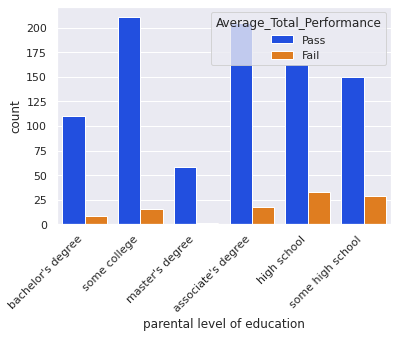

In [40]:
# Parental effect on total marks
sns.countplot(x='parental level of education', data = raw_data, hue='Average_Total_Performance', palette='bright')
plt.xticks(rotation=45, ha='right')

In [41]:
# Bar Plot of Scores according to gender
raw_data.groupby(['gender']).mean()


,math score,reading score,writing score,average total score
gender,,,,
female,63.633205,72.608108,72.467181,69.569498
male,68.728216,65.473029,63.311203,65.837483


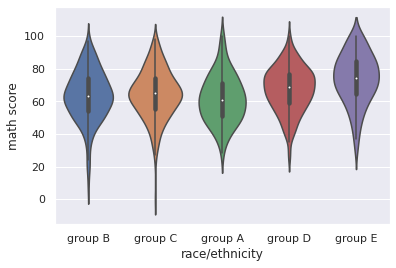

In [42]:
# race vs math
sns.violinplot(x=raw_data['race/ethnicity'],y=raw_data['math score'])
plt.show()


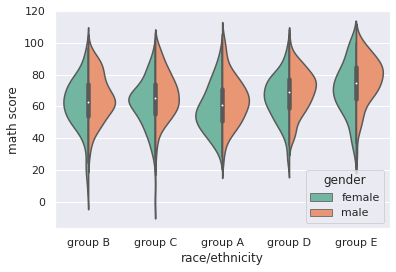

In [43]:
sns.violinplot(x=raw_data["race/ethnicity"],y=raw_data["math score"],hue=raw_data["gender"],split=True,palette="Set2")


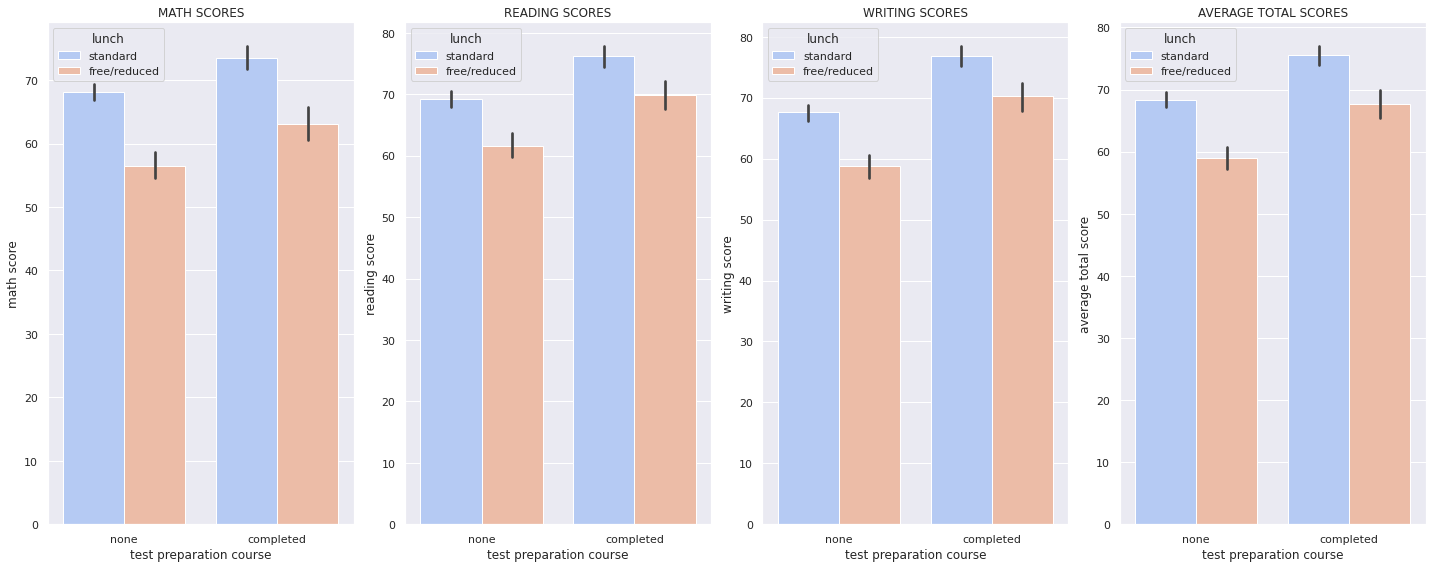

In [44]:
# How lunch affects
plt.figure(figsize=(20,8))
plt.subplot(1,4,1)#(1, 3, 1)
sns.barplot(x='test preparation course',y='math score',data=raw_data,hue='lunch',palette='coolwarm')
plt.title('MATH SCORES')
plt.subplot(1,4,2)#(1, 3, 2)
sns.barplot(x='test preparation course',y='reading score',data=raw_data,hue='lunch',palette='coolwarm')
plt.title('READING SCORES')
plt.subplot(1,4,3)#(1, 3, 3)
sns.barplot(x='test preparation course',y='writing score',data=raw_data,hue='lunch',palette='coolwarm')
plt.title('WRITING SCORES')
plt.subplot(1,4,4)#(2, 3, 1)
sns.barplot(x='test preparation course',y='average total score',data=raw_data,hue='lunch',palette='coolwarm')
plt.title('AVERAGE TOTAL SCORES')
plt.tight_layout()
plt.show()

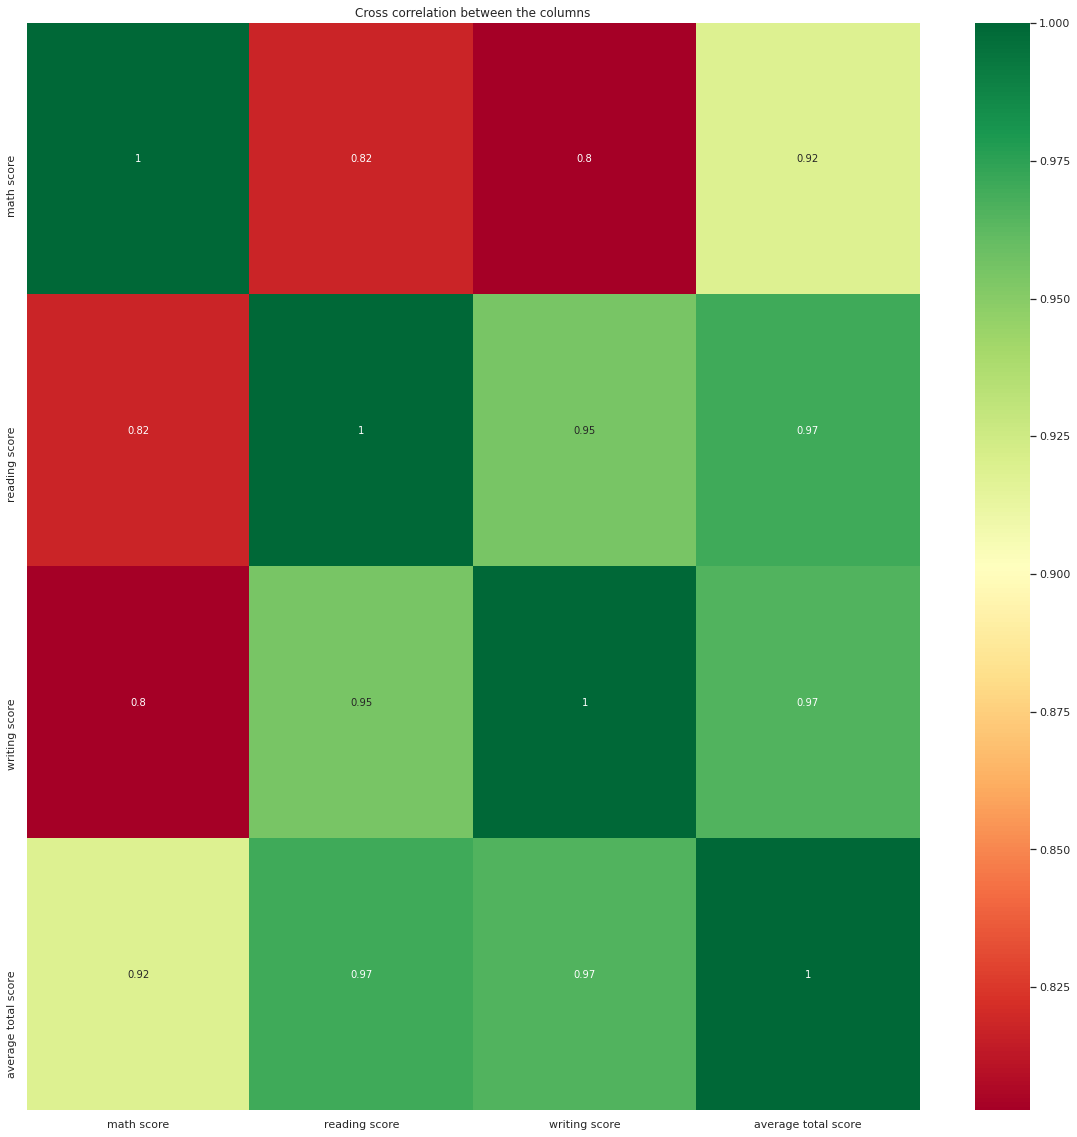

In [45]:
# correlation between features
plt.figure(figsize=(20,20))
sns.heatmap(raw_data.corr() ,annot=True,cmap="RdYlGn")
plt.title('Cross correlation between the columns')
plt.show()

In [0]:
# this model is ready to be fitted in an algorithm but first requires one hot encodding to convert categorical features to numeric